# Stroke Prediction 

### Installing packages 

In [1]:
pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip3 install imblearn


Defaulting to user installation because normal site-packages is not writeable


In [3]:
import numpy as np 
import pandas as pd
import imblearn



In [4]:
import warnings  
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

### Importing and reading data 

In [5]:
data1 = pd.read_csv('healthcare-dataset-stroke-data.csv')
data1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Check for null values 

In [6]:
data1.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Since the BMI column contains null values we need to fix it 

We use the mean value to fix those null values 

In [7]:
avg = data1['bmi'].mean()
avg

28.893236911794673

For adults, the normal BMI range is between 18.5 and 24.9
The average BMI calculation comes out to be more than normal. Hence, we can say that large proportion of the population in the given dataset is overweight. 

In [8]:
data1.bmi=(data1.bmi.fillna(28.74))

After filling the NA values for BMI let's check again for any null values

In [9]:
data1.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Hence no null values 

#### Feature datatypes- what data type variable are provided in the dataset and Initial insights about dataset  

In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [11]:
data1.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.887209,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698075,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


From above statistical description of the dataset we can conclude:

1. Mean age of people is around 43 
2. Mean BMI is more than normal 
3. Both Categorical and numerical features are present.

Categorical Features: gender, ever_married, work_type, Residence_type, smoking_status

Binary Numerical Features: hypertension,heart_disease, stroke

Continous Numerical Features: age, avg_glucose_level, bmi

4. Most of the data is categorical which need a special attention to visulaize those

### Countplot to see the distribution of Categorical features:

<AxesSubplot:xlabel='work_type', ylabel='count'>

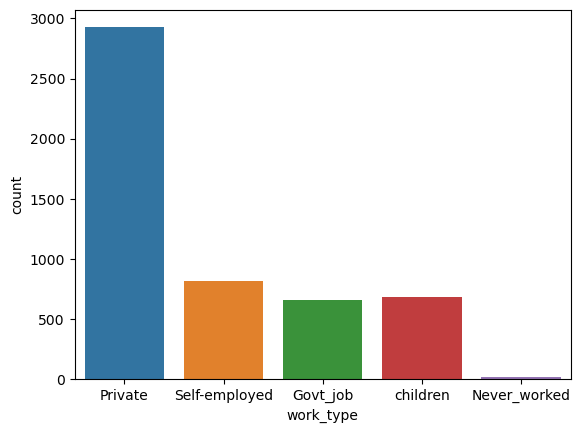

In [12]:
sns.countplot(data1['work_type'])

Most people work in the Private sector 

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

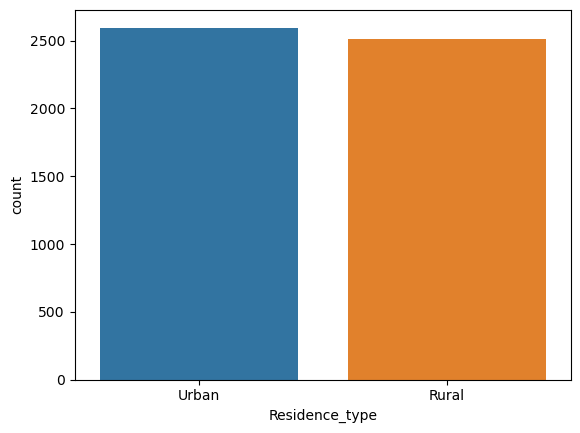

In [13]:
sns.countplot(data1['Residence_type'])

Almost same number of people living in both areas 

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

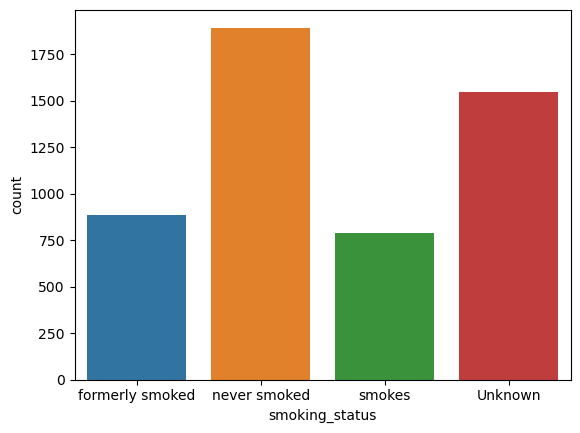

In [14]:
sns.countplot(data1['smoking_status'])

Most people have never smoked 

<AxesSubplot:xlabel='ever_married', ylabel='count'>

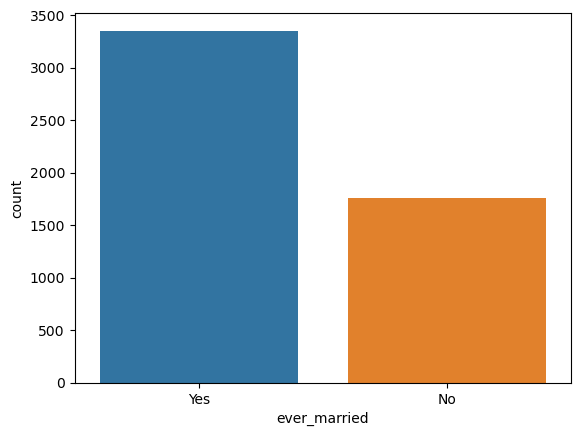

In [15]:
sns.countplot(data1['ever_married'])

More people are married in the dataset population 

<AxesSubplot:xlabel='stroke', ylabel='count'>

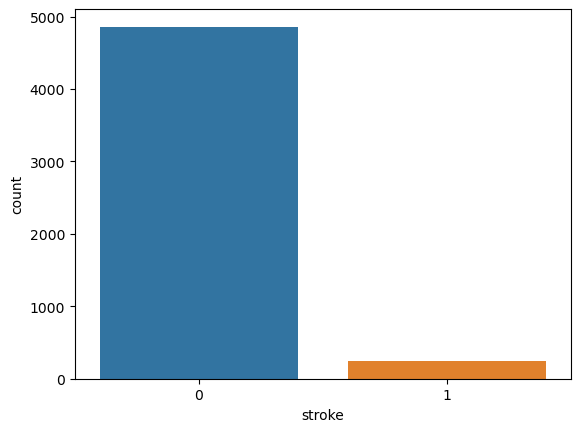

In [16]:
sns.countplot(data1['stroke'])

The above graph shows that there is a HIGH IMBALANCE i.e., this is a highly unbalanced data distribution so while applying any ML model and training, either over sampling or under sampling has to be done to obtain best results. 

### Distplot to see the distribution of Continuous numerical features:

In [17]:
min_avg_glucose_level = min(data1.avg_glucose_level)
max_avg_glucose_level = max(data1.avg_glucose_level)
print(min_avg_glucose_level)
print(max_avg_glucose_level)

55.12
271.74


Since there is a high difference between the minimum and maximum values of average glucose level we need to standardize the column 

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

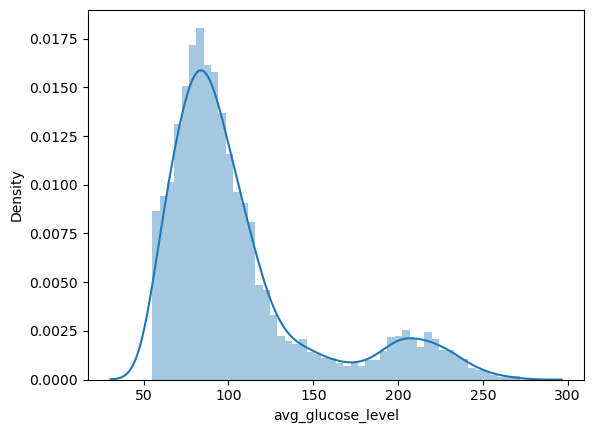

In [18]:
sns.distplot(data1['avg_glucose_level'])

<AxesSubplot:xlabel='age', ylabel='Density'>

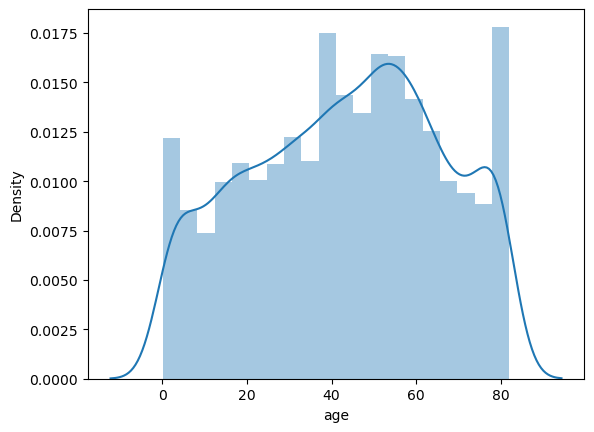

In [19]:
sns.distplot(data1['age'])

#### Mapping of categorical variables: 

In [20]:
data1['work_type'] = data1['work_type'].map({'Private':0, 'Self-employed': 1, 'Govt_job':2, 'children':3, 'Never_worked':4})

In [21]:
data1['gender'] = data1['gender'].map({'Male':0, 'Female':1})
data1['Residence_type'] = data1['Residence_type'].map({'Urban':0, 'Rural':1})
data1['smoking_status'] = data1['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})
data1['ever_married'] = data1['ever_married'].map({'Yes':0, 'No':1})

Checking the dataset after mapping of categorical variables 

In [22]:
data1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0.0,67.0,0,1,0,0,0,228.69,36.60,0,1
1,51676,1.0,61.0,0,0,0,1,1,202.21,28.74,1,1
2,31112,0.0,80.0,0,1,0,0,1,105.92,32.50,1,1
3,60182,1.0,49.0,0,0,0,0,0,171.23,34.40,2,1
4,1665,1.0,79.0,1,0,0,1,1,174.12,24.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1.0,80.0,1,0,0,0,0,83.75,28.74,1,0
5106,44873,1.0,81.0,0,0,0,1,0,125.20,40.00,1,0
5107,19723,1.0,35.0,0,0,0,1,1,82.99,30.60,1,0
5108,37544,0.0,51.0,0,0,0,0,1,166.29,25.60,0,0


#### Correlation Heatmap 
To check for any correlation between variables 

<AxesSubplot:>

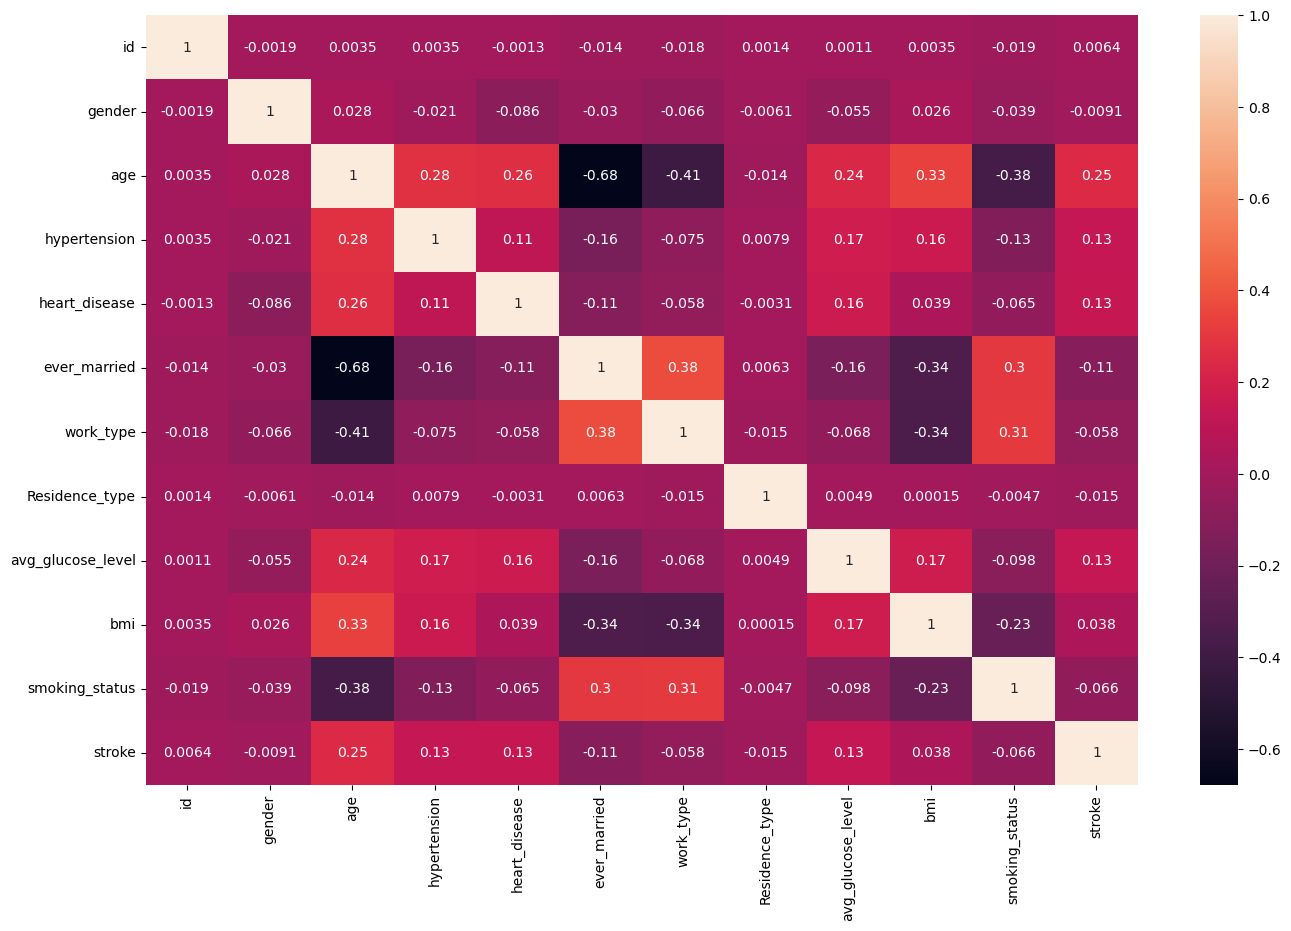

In [23]:
plt.figure(figsize=(16,10))
sns.heatmap(data1.corr(method='pearson'),annot=True)

From above figure we can say that marriage and age are negatively correlated in highest order and stroke and age have a postive correlation 

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

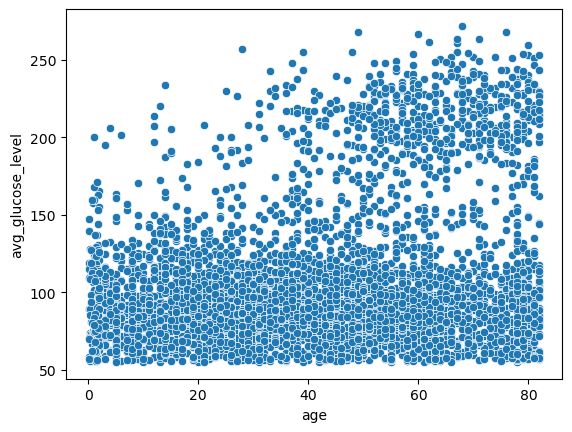

In [24]:
sns.scatterplot(x=data1['age'], y=data1['avg_glucose_level'])


From above scatter plot we can say that as the age increases, the glucose level also increases. 

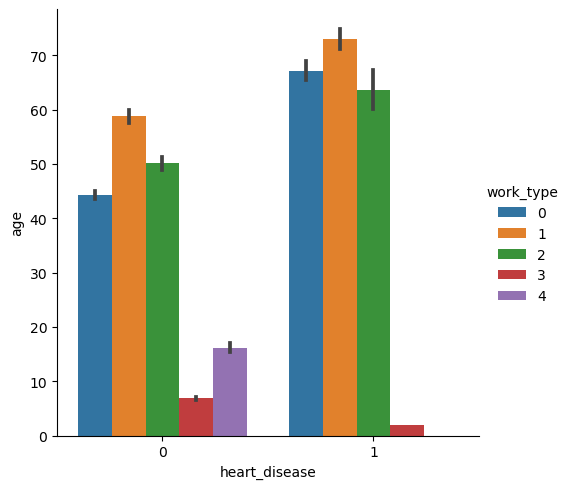

In [25]:
sns.catplot(x='heart_disease',y='age', hue="work_type", kind="bar", data=data1)

People who are self employed have a greater tendency of having a heart disease and hypertension. 

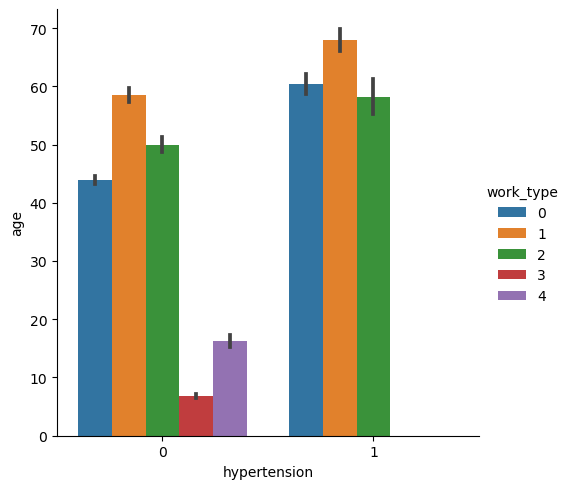

In [26]:
sns.catplot(x='hypertension',y='age', hue="work_type", kind="bar", data=data1)

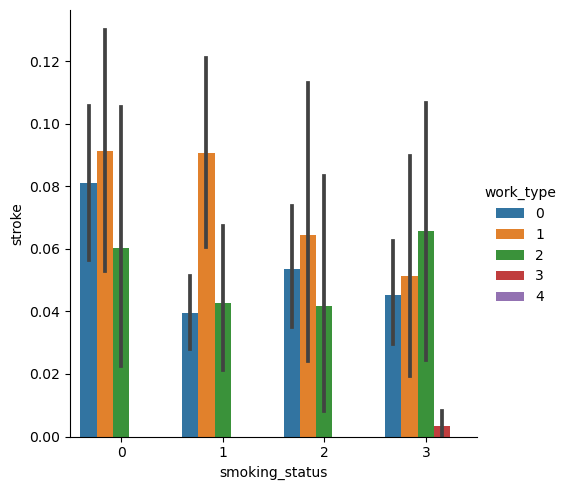

In [27]:
sns.catplot(x="smoking_status", y="stroke", hue="work_type", kind="bar", data=data1)

Self employed people tend to smoke more and hence have a greater chance of stroke. Even if they don't smoke or used to smoke they still have a greater chance of stroke than other people.  

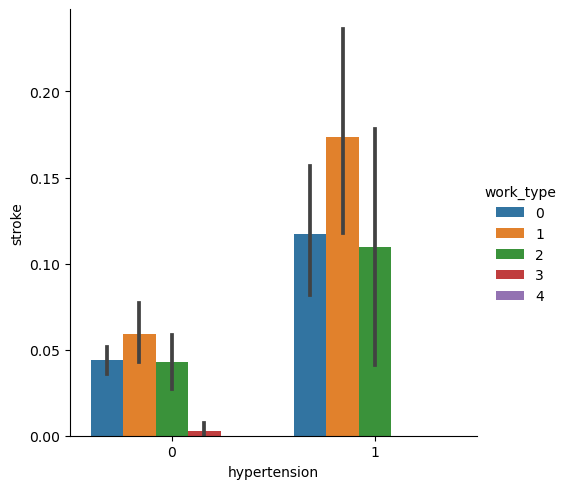

In [28]:
sns.catplot(x="hypertension", y="stroke", hue="work_type", kind="bar", data=data1)

There are more number of people who have hypertension and again self-employed people are at a greater risk of stroke 

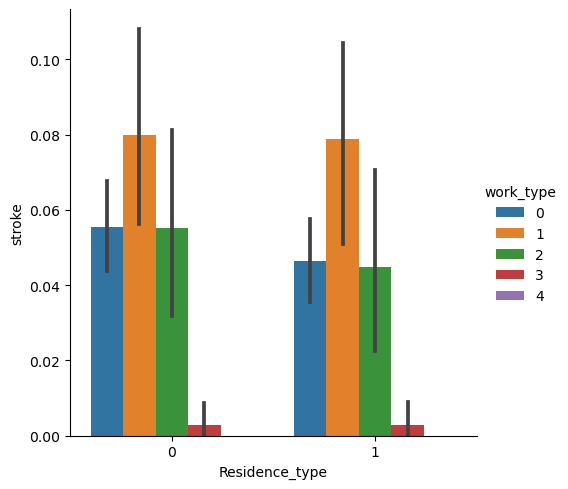

In [29]:
sns.catplot(x="Residence_type", y="stroke", hue="work_type", kind="bar", data=data1)

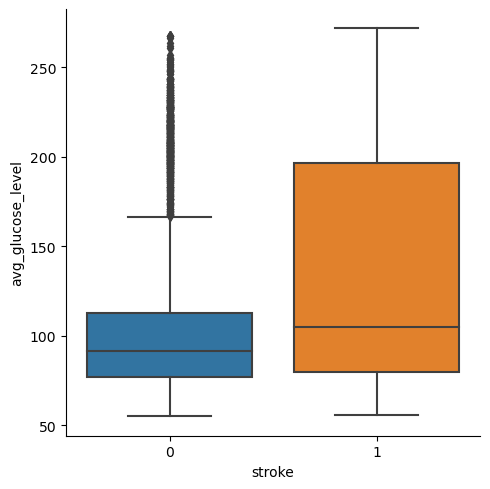

In [30]:
sns.catplot(x='stroke', y="avg_glucose_level", kind="box", data=data1)

People having higher glucose level are at a higher risk of stroke 

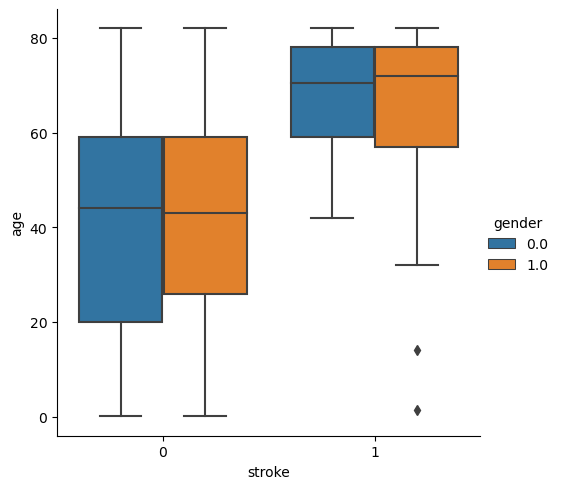

In [31]:
sns.catplot(x='stroke', y="age", hue = 'gender', kind="box", data=data1)

Irrespective of gender, elderly men and women are prone to strokes 

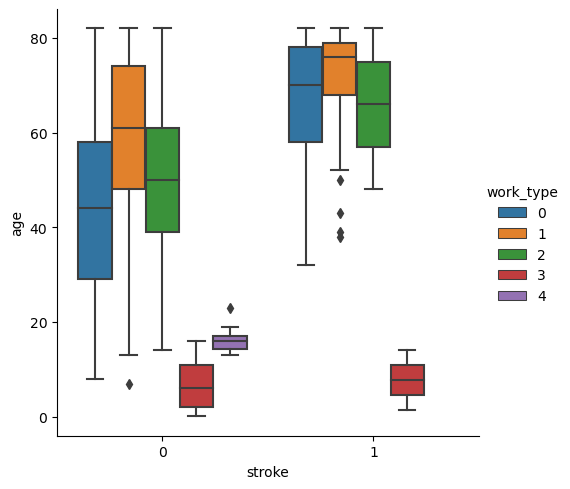

In [32]:
sns.catplot(x='stroke', y="age", hue = 'work_type', kind="box", data=data1)

### Applying Machine learning algorithms for prediction 

Dividing the dataset into features and labels

In [33]:
features = ['id','age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'gender',
 'work_type',
 'smoking_status']

label = ['stroke']

X = data1[['id','age','hypertension','heart_disease','ever_married','Residence_type','avg_glucose_level','bmi','gender','work_type','smoking_status']]
X
y=data1['stroke']

Check for null values in dataset again 

In [34]:
X.isnull().sum() 

id                   0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
gender               1
work_type            0
smoking_status       0
dtype: int64

There is 1 null value in Gender column

In [35]:
X.gender=(X.gender.fillna(1))

In [36]:
X.isnull().sum()

id                   0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
gender               0
work_type            0
smoking_status       0
dtype: int64

#### Treating Imbalance class using SMOTE

Since the target class is highly imbalanced, we need to treat it for better performance of the model. So we used SMOTE technique. 

In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)

Splitting of dataset into train and test

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.33,random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [39]:
testing = X_test['id'] #taking ID column for the purpose of submission
testing

315     41940
534     71808
1427     5984
9125    39138
6025    36791
        ...  
3065    46455
8270    34066
6574     8080
2487    44325
620     34558
Name: id, Length: 1605, dtype: int64

Since ID column does not affect the model's performance, we drop it

In [40]:
X_train = X_train.drop(columns=['id'])
X_test = X_test.drop(columns=['id'])

#### Standardization of the data:
since data is in different scales

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Data points after standardization 

In [42]:
X_train

array([[-0.04839829, -0.30760665, -0.22165323, ...,  0.95058511,
        -0.61094135,  0.71189771],
       [ 1.12056947, -0.30760665, -0.22165323, ..., -1.16408234,
        -0.61094135, -1.20286165],
       [-0.42257666, -0.30760665, -0.22165323, ..., -0.32456937,
        -0.61094135, -0.24548197],
       ...,
       [ 0.84953481,  3.25090505, -0.22165323, ...,  0.95058511,
        -0.61094135, -0.24548197],
       [-0.42058273, -0.30760665, -0.22165323, ...,  0.95058511,
        -0.61094135,  0.71189771],
       [ 0.38327967, -0.30760665, -0.22165323, ..., -1.00393308,
        -0.61094135, -1.20286165]])

In [43]:
X_test

array([[ 0.09117088, -0.30760665,  4.51155166, ..., -1.25727863,
        -0.61094135, -1.20286165],
       [-1.63018219, -0.30760665, -0.22165323, ...,  0.95058511,
        -0.61094135,  1.66927739],
       [-1.39756691, -0.30760665, -0.22165323, ..., -1.25727863,
        -0.61094135,  0.71189771],
       ...,
       [ 0.54544953, -0.30760665, -0.22165323, ..., -0.17933421,
         0.47653091, -0.24548197],
       [ 1.06815505, -0.30760665, -0.22165323, ..., -1.25727863,
         0.47653091,  0.71189771],
       [-1.02538246, -0.30760665, -0.22165323, ..., -1.25727863,
        -0.61094135, -0.24548197]])

### Logistic Regression 

In [44]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)


LogisticRegression()

In [45]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

Classification report of Logistic Regression 

In [46]:
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 
classification_report = classification_report(y_test, y_pred_log_reg)
print(classification_report)

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       803
           1       0.80      0.87      0.83       802

    accuracy                           0.82      1605
   macro avg       0.83      0.82      0.82      1605
weighted avg       0.83      0.82      0.82      1605



In [47]:
auc = roc_auc_score(y_test, y_pred_log_reg)
auc

0.8249496122706932

In [48]:
cm = confusion_matrix(y_test, y_pred_log_reg)
cm

array([[627, 176],
       [105, 697]], dtype=int64)

In [49]:
predicted_probab_log = log_reg.predict_proba(X_test)
predicted_probab_log = predicted_probab_log[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_log)

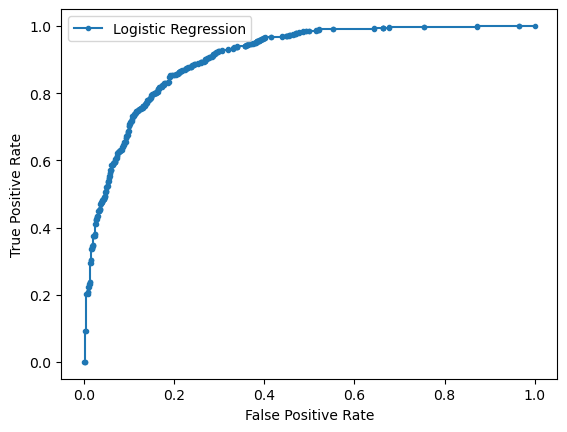

In [50]:
from matplotlib import pyplot
pyplot.plot(fpr, tpr, marker='.', label='Logistic Regression')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

### Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
rfc_predict = rfc.predict(X_test)
roc_auc_score(y_test, rfc_predict)

0.9177577538097471

In [53]:
cm = confusion_matrix(y_test, rfc_predict)
cm

array([[736,  67],
       [ 65, 737]], dtype=int64)

In [54]:
tn = cm[0,0]
fp = cm[0,1]
tp = cm[1,1]
fn = cm[1,0]
accuracy  = (tp + tn) / (tp + fp + tn + fn)
precision = tp / (tp + fp)
recall    = tp / (tp + fn)
f1score  = 2 * precision * recall / (precision + recall)
print(f1score)

0.9178082191780822


In [55]:
predicted_probab = rfc.predict_proba(X_test)

In [56]:
predicted_probab = predicted_probab[:, 1]

In [57]:
fpr, tpr, _ = roc_curve(y_test, predicted_probab)

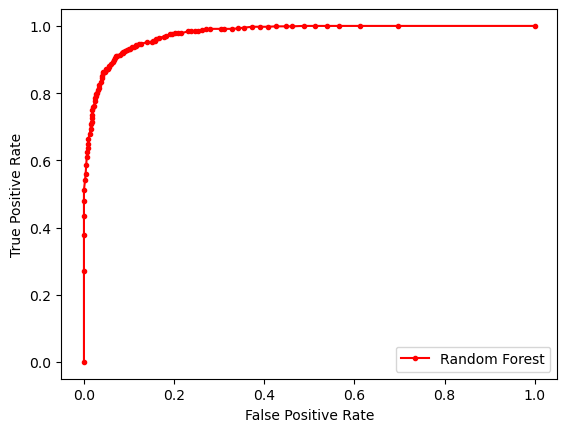

In [58]:
from matplotlib import pyplot
pyplot.plot(fpr, tpr, marker='.', color='red', label='Random Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

### XGBoost Classifier 

In [59]:
!pip3 install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [60]:
import xgboost as xgb

In [61]:
model = xgb.XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [62]:
y_pred1 = model.predict(X_test)

In [63]:
roc_auc_score(y_test, y_pred1)

0.945784666602485

In [64]:
cm = confusion_matrix(y_test, y_pred1)
cm

array([[772,  31],
       [ 56, 746]], dtype=int64)

In [65]:
tn = cm[0,0]
fp = cm[0,1]
tp = cm[1,1]
fn = cm[1,0]
accuracy  = (tp + tn) / (tp + fp + tn + fn)
precision = tp / (tp + fp)
recall    = tp / (tp + fn)
f1score  = 2 * precision * recall / (precision + recall)
print(f1score)

0.9449018366054465


In [66]:
predicted_probab = model.predict_proba(X_test)
predicted_probab = predicted_probab[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab)

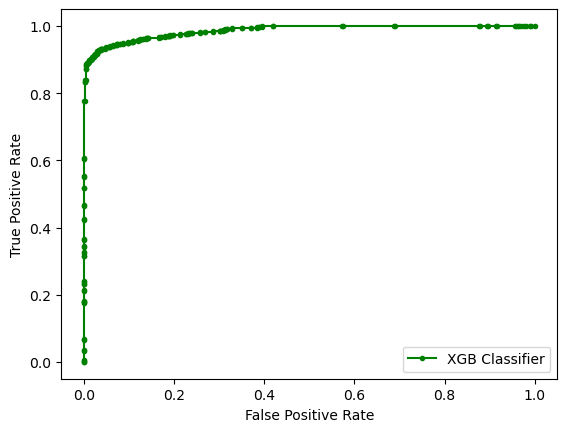

In [67]:
from matplotlib import pyplot
pyplot.plot(fpr, tpr, marker='.', color='green',label='XGB Classifier')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

## KNN


In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knn=KNeighborsClassifier(n_neighbors=33)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=33)

In [70]:
!pip3 install numpy

Defaulting to user installation because normal site-packages is not writeable


In [71]:
y_scores = knn.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
y_pred2 = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)
cm

#roc_auc = auc(fpr, tpr)

array([[606, 197],
       [ 77, 725]], dtype=int64)

In [72]:
tn = cm[0,0]
fp = cm[0,1]
tp = cm[1,1]
fn = cm[1,0]
accuracy  = (tp + tn) / (tp + fp + tn + fn)
precision = tp / (tp + fp)
recall    = tp / (tp + fn)
f1score  = 2 * precision * recall / (precision + recall)
print(f1score)

0.8410672853828306


In [73]:
predicted_probab1 = knn.predict_proba(X_test)
predicted_probab1 = predicted_probab1[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab1)

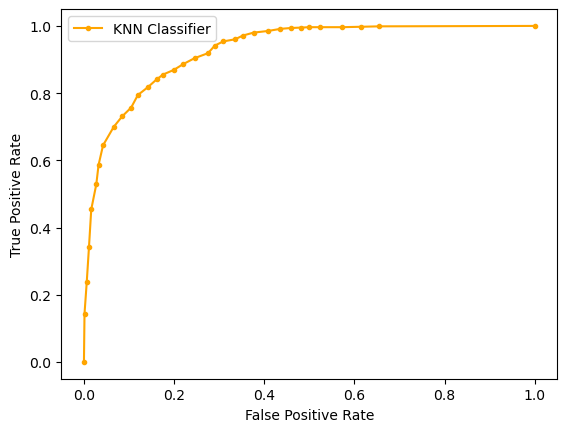

In [74]:
from matplotlib import pyplot
pyplot.plot(fpr, tpr, marker='.', color='orange',label='KNN Classifier')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

#from matplotlib import pyplot
#pyplot.plot(fpr, tpr, 'b', label = 'KNN Classifier' % roc_auc , color ='orange')
#plt.legend(loc = 'lower right')
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')
#plt.show()

### Averaging 

In [75]:
model1 = xgb.XGBClassifier()
model2 = RandomForestClassifier()
model3= LogisticRegression()
model4= KNeighborsClassifier()

In [76]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)

KNeighborsClassifier()

In [77]:
pred1=model1.predict_proba(X_test)
pred2=model2.predict_proba(X_test)
pred3=model3.predict_proba(X_test)
pred4=model4.predict_proba(X_test)

In [78]:
finalpred=(pred1+pred2+pred3+pred4)/4

In [79]:
print (finalpred)

[[0.87188006 0.12811994]
 [0.9978607  0.00213931]
 [0.99064281 0.00935719]
 ...
 [0.08216713 0.91783287]
 [0.33169247 0.66830753]
 [0.85931908 0.14068092]]


## Max voting


In [80]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state=1)
model2 = xgb.XGBClassifier(random_state=1)
model3 = RandomForestClassifier(random_state=1)
model4 = KNeighborsClassifier()

model = VotingClassifier(estimators=[('lr',model1),('dt', model2),('rf',model3)], voting='soft')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9314641744548287

In [81]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state=1)
model2 = xgb.XGBClassifier(random_state=1)
model3 = RandomForestClassifier(random_state=1)
model4 = KNeighborsClassifier()

model = VotingClassifier(estimators=[('lr',model1),('rf', model3),('KN',model4)], voting='soft')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8884735202492212

In [82]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state=1)
model2 = xgb.XGBClassifier(random_state=1)
model3 = RandomForestClassifier(random_state=1)
model4 = KNeighborsClassifier()

model = VotingClassifier(estimators=[('lr',model1),('xgb', model2),('KN',model4)], voting='soft')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9059190031152647

In [83]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state=1)
model2 = xgb.XGBClassifier(random_state=1)
model3 = RandomForestClassifier(random_state=1)
model4 = KNeighborsClassifier()

model = VotingClassifier(estimators=[('xgb',model2),('rf', model3),('KN',model4)], voting='soft')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9252336448598131

In [84]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state=1)
model2 = xgb.XGBClassifier(random_state=1)
model3 = RandomForestClassifier(random_state=1)
model4 = KNeighborsClassifier()

model = VotingClassifier(estimators=[('lr',model1),('xgb',model2),('rf', model3),('KN',model4)], voting='soft')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9133956386292835